$\textbf{ Effective Permittivity Computing for TM}_{\Large mn}$

$\text{In Microstrip Antenna Patch Rectangular}$

$\circ \,\,\, \text{Effective Relative Permittivity:}$

$$\epsilon_{ef}(L) = \frac{\epsilon_r+1}{2} + \frac{\epsilon_r-1}{2}\frac{1}{\sqrt{1+12(h/L)}},$$
$$\epsilon_{ef}(W) = \frac{\epsilon_r+1}{2} + \frac{\epsilon_r-1}{2}\frac{1}{\sqrt{1+12(h/W)}},$$
$\text{If} \,\, m,n \neq 0,0:$
$$\epsilon_{ef}(L,W) = \frac{\epsilon_{ef}(L)\epsilon_{ef}(W)}{\epsilon_r}.$$

$\circ \,\,\, \text{Energy's Leakage (extended length):}$

$$\Delta W = 0.412 h\frac{(\epsilon_{ef}(W) + 0.3) \big(\frac{W}{h} + 0.264\big)}{(\epsilon_{ef}(W) - 0.258) \big(\frac{W}{h} + 0.8 \big)}$$
$$\Delta L = 0.412 h\frac{(\epsilon_{ef}(L) + 0.3) \big(\frac{L}{h} + 0.264\big)}{(\epsilon_{ef}(L) - 0.258) \big(\frac{L}{h} + 0.8 \big)}$$

$\circ \,\,\, \text{Frequency Resonance:}$

$$(f_r)_{mn}=\frac{c_0}{2\sqrt{\epsilon_{ef}(W,L)}}\sqrt{\Bigg(\frac{m}{L+2\Delta L}\Bigg)^2+\Bigg(\frac{n}{W+2\Delta W}\Bigg)^2}$$

In [2]:
import numpy as np
def high_order_tm(m,n,L,W,e_r,h):
    c0 = 2.99702547e8 # Approximatilly Light velocity in air
    # Computing effective dieletric constant
    if m == 0 and n != 0:
        eef_L = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/L/h)))
        eef = eef_L
        print("eef:\n", eef)
    elif m != 0 and n == 0:
        eef_W = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/W/h)))
        eef = eef_W
        print("eef:\n", eef)
    elif m != 0  and n != 0:
        eef_W = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/W/h)))
        eef_L = (e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/L/h)))
        eef = (eef_L*eef_W)/e_r
        print("eef_L:\n", eef_L)
        print("eef_W:\n", eef_W)
        print("eef:\n", eef)
    # Increasing the edge's resonator due to fringe effect
    if m == 0 and n != 0:
        delta_L = 0.412*h*((eef_L + 0.3)*(L/h + 0.264))/((eef_L - 0.258)*(L/h + 0.8))
        delta_W = 0
        print("delta_L [mm]:\n",delta_L*1e3)
    elif m != 0 and n == 0:
        delta_W = 0.412*h*((eef_W + 0.3)*(W/h + 0.264))/((eef_W - 0.258)*(W/h + 0.8))
        delta_L = 0
        print("delta_W [mm]:\n",delta_W*1e3)
    elif m != 0  and n != 0:
        delta_W = 0.412*h*((eef_W + 0.3)*(W/h + 0.264))/((eef_W - 0.258)*(W/h + 0.8))
        delta_L = 0.412*h*((eef_L + 0.3)*(L/h + 0.264))/((eef_L - 0.258)*(L/h + 0.8))
        print("delta_L [mm]:\n",delta_L*1e3)
        print("delta_W [mm]:\n",delta_W*1e3)
    # Frequency resonance
    fr_mn = (c0/(2*np.sqrt(eef)))*np.sqrt((m/(L+2*delta_L))**2+(n/(W+2*delta_W))**2)
    return print("freq [GHz]:\n",fr_mn/1e9)

In [3]:
n = 2 # Higher-Order n and m at TMmn
m = 2
L = 60e-3 # Patch length
W = 60e-3 # Patch width
e_r = 2.2
h = 1.575e-3
high_order_tm(m,n,L,W,e_r,h)

eef_L:
 1.6016837391943384
eef_W:
 1.6016837391943384
eef:
 1.166086727454344
delta_L [mm]:
 0.9057170508126537
delta_W [mm]:
 0.9057170508126537
freq [GHz]:
 6.349962866852452


max(eff):
 1.1681
min(eff):
 1.1636


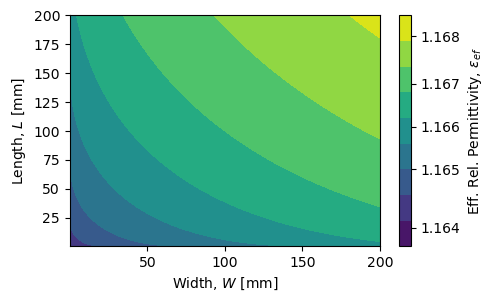

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
num = 201
L_v = np.array(np.linspace(0.0001,200,num)*1e-3) # Lenght vector in mm
W_v = np.array(np.linspace(0.0001,200,num)*1e-3) # Width vector in mm
L_mesh,W_mesh = np.meshgrid(L_v,W_v) # Creating a mesh-matrix with intial vectors
# Effective Relative Permittivity multidimensional compute
eff = ((e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/W_mesh/h))))*((e_r+1)/2 + ((e_r-1)/2)*(1/np.sqrt(1+12*(1/L_mesh/h))))/e_r
max_eff = np.max(eff) # Maximum reference of effective rel. permit.
min_eff = np.min(eff) # Minimum reference
print(f"max(eff):\n {max_eff:.4f}")
print(f"min(eff):\n {min_eff:.4f}")
plt.figure(figsize=(5,3)) # Plotting contour
plt.contourf(L_mesh*1e3,W_mesh*1e3,eff,cmap='viridis')
plt.xlabel("Width, $W$ [mm]")
plt.ylabel("Length, $L$ [mm]")
ticks = [min_eff,1.165,1.166,1.167,max_eff]
cbar = plt.colorbar() # Scale colorbar with ticks reference
cbar.set_ticks(ticks)
def format_ticks(x,pos): # We have defined a function for arounded values (into colorbar)
    return f"{x:.3f}"
cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
cbar.set_label("Eff. Rel. Permittivity, $\epsilon_{ef}$") # Set label for colorbar
plt.show()